### Comparing Weather Temperature Variability for Agricultural Investment Decisions

**context:** An agricultural investment firm is in the process of deciding on a location for a new farming project. Understanding that **consistent** and predictable weather conditions are vital for successful agriculture, the firm aims to evaluate and compare two potential cities based on their temperature stability. The key factor in this decision-making process is the variability in average daily temperatures, as it directly impacts crop growth and agricultural planning.

The firm has provided a dataset, named **"climate_data.csv"**, to aid in this assessment. This dataset includes the following columns:

- **month:** Indicates the month of the year.
- **Avg Temp City A (°C):** The average daily temperature for City A in each month, measured in degrees Celsius.
- **Avg Temp City B (°C):** The average daily temperature for City B in each month, measured in degrees Celsius.

### Task Objective

- Calculate the standard deviation for average temperatures in both cities.
- Determine which city has a higher temperature variability.
- Decide on the city with more stable (lower variability) temperatures for agricultural investment.

**Import necessary libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

**1: Data Import**

In [2]:
df = pd.read_csv("climate_data.csv")
df

,Year,Month,Avg Temp City A (°C),Avg Temp City B (°C)
0,2010,January,17,12
1,2011,February,17,16
2,2012,March,15,16
3,2013,April,14,15
4,2014,May,16,14
...,...,...,...,...
235,2025,August,13,19
236,2026,September,13,21
237,2027,October,15,20
238,2028,November,15,20


**2: Calculate standard deviations**

In [72]:
# -----> 'City A' standard deviation
std_cta = df["Avg Temp City A (°C)"].std()
print(f"Standard deviation for city A: {std_cta}")

Standard deviation for city A: 3.099104000625755


In [70]:
# -----> 'City B' standard deviation
std_ctb = df["Avg Temp City B (°C)"].std()
print(f"Standard deviation for city B: {std_ctb}")

Standard deviation for city B: 2.926386474198816


**3: Comparison**

In [71]:
min_std_dev = min(std_cta, std_ctb)
max_std_dev = max(std_cta, std_ctb)
print(f"City A climate standard deviation: {std_cta:.2f}")
print(f"City B climate standard deviation: {std_ctb:.2f}")
print(f"City A has {"more" if max_std_dev == std_cta else "less"} standard deviation than city B")

City A climate standard deviation: 3.10
City B climate standard deviation: 2.93
City A has more standard deviation than city B


**4: Observation and Decision**

In [48]:
xlabels = df["Year"].unique()
xlabels

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029])

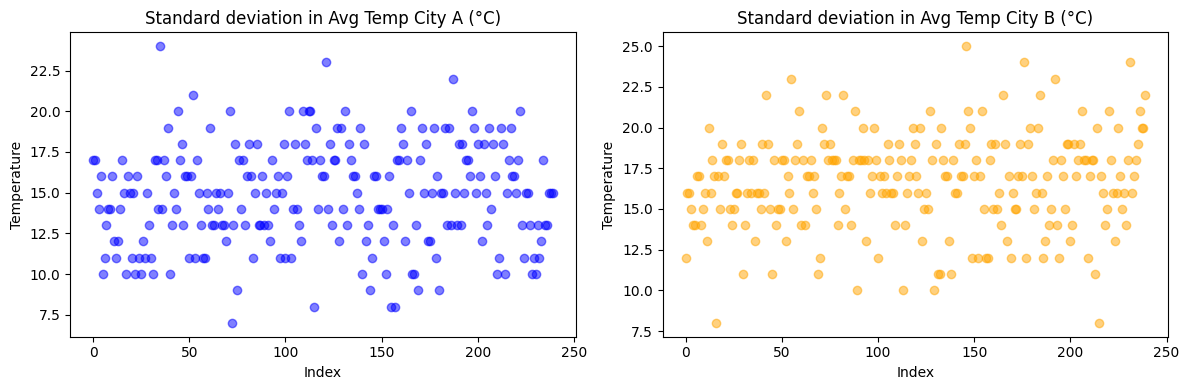

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True)
    
axes[0].scatter(df.index, df["Avg Temp City A (°C)"], color='blue', alpha=0.5)
axes[0].set_title(f'Standard deviation in {"Avg Temp City A (°C)"}')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Temperature')

axes[1].scatter(df.index, df["Avg Temp City B (°C)"], color='orange', alpha=0.5)
axes[1].set_title(f'Standard deviation in {"Avg Temp City B (°C)"}')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

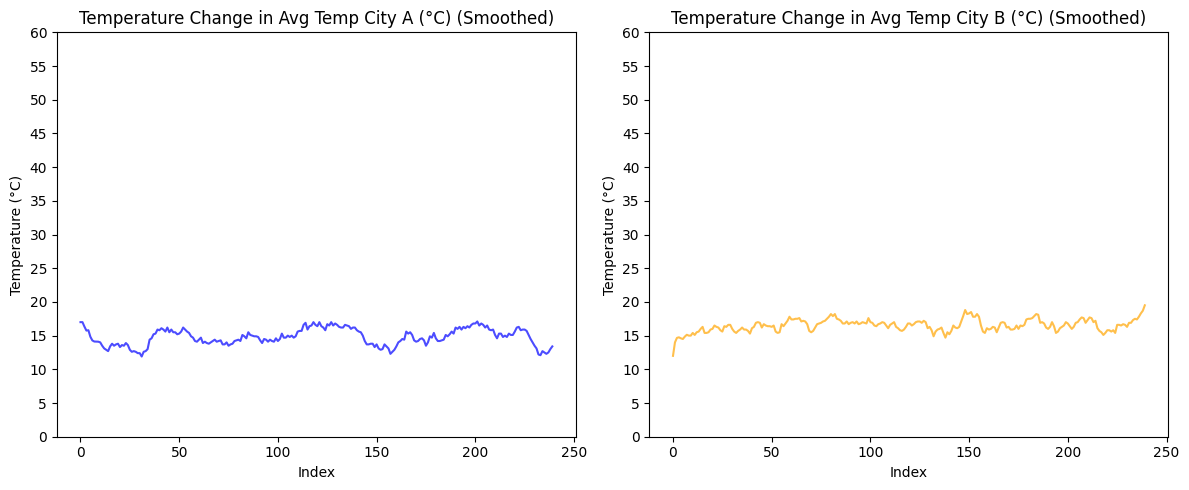

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)

# Apply smoothing using a rolling mean
df[f'Avg Temp City A (°C)_smooth'] = df["Avg Temp City A (°C)"].rolling(window=10, min_periods=1).mean()
df[f'Avg Temp City B (°C)_smooth'] = df["Avg Temp City B (°C)"].rolling(window=10, min_periods=1).mean()

# Define static y-limits for consistency
y_min, y_max = 0, 60  # Fixed range from 0 to 60 degrees
custom_yticks = list(range(y_min, y_max + 1, 5))  # Tick marks every 5 degrees

axes[0].plot(df.index, df[f'Avg Temp City A (°C)_smooth'], color='blue', alpha=0.7)
axes[0].set_title(f'Temperature Change in Avg Temp City A (°C) (Smoothed)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(custom_yticks)

axes[1].plot(df.index, df[f'Avg Temp City B (°C)_smooth'], color='orange', alpha=0.7)
axes[1].set_title(f'Temperature Change in Avg Temp City B (°C) (Smoothed)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(custom_yticks)

plt.tight_layout()
plt.show()

In [94]:
print(f"City A climate standard deviation: {std_cta:.2f}")
print(f"City B climate standard deviation: {std_ctb:.2f}")

# Decision Making
if std_cta < std_ctb:
    print("Invest in City A due to more stable temperature conditions.")
else:
    print("Invest in City B due to more stable temperature conditions.")

City A climate standard deviation: 3.10
City B climate standard deviation: 2.93
Invest in City B due to more stable temperature conditions.


In [104]:
print("\t\t\tMin\tMax")
print(f"City A temperature:\t{df["Avg Temp City A (°C)"].min()}\t{df["Avg Temp City A (°C)"].max()}")
print(f"City B temperature:\t{df["Avg Temp City B (°C)"].min()}\t{df["Avg Temp City B (°C)"].max()}")

			Min	Max
City A temperature:	7	24
City B temperature:	8	25


- City B demonstrated a notably lower standard deviation in its average daily temperatures compared to City A. This indicates that City B experiences less fluctuation in temperature throughout the year.
- The temperature range in City B was found to be more consistent and narrow, fluctuating moderately between 8°C and 25°C.
- Conversely, City A displayed higher variability with temperatures ranging more broadly from 7°C to 24°C.
- Based on above observations, we recommend choosing City B for the agricultural investment. 